# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

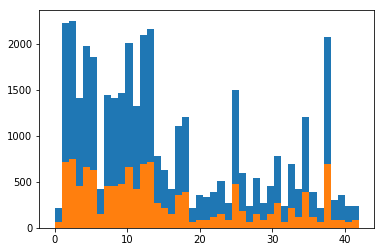

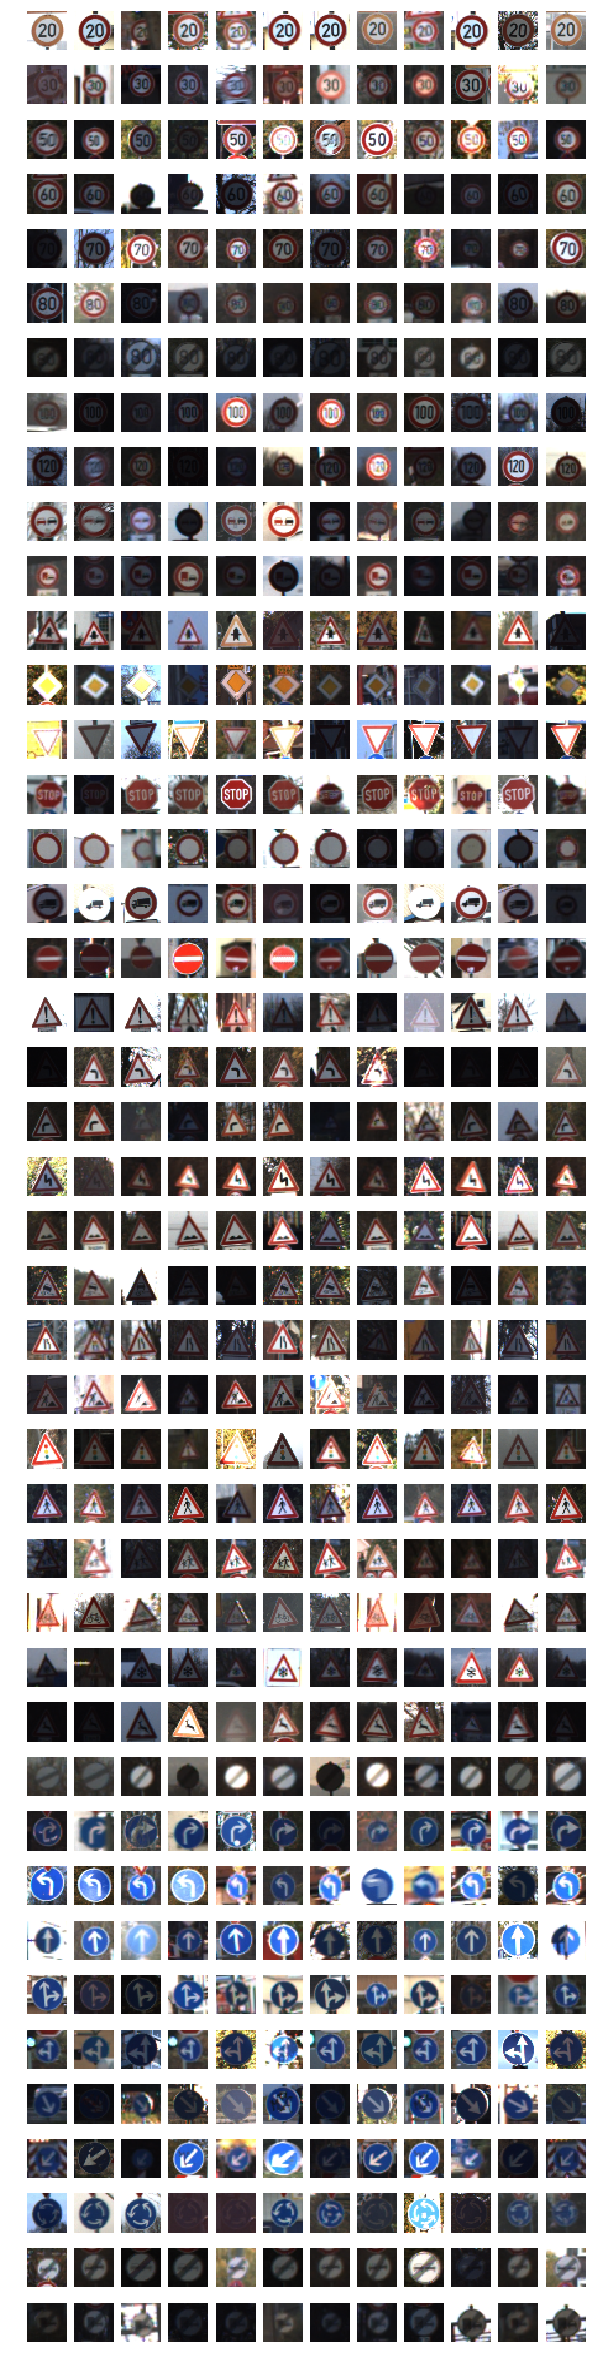

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

classes = list(set(y_train))
# classes_index will be dictionary: each class -> randomized set of indexes 
classes_index = {}
for i,x in enumerate(y_train):
    if x not in classes_index:
        classes_index[x]=[i]
    else:
        classes_index[x].append(i)
for c in classes:
    random.shuffle(classes_index[c])

# show classes histogram in training and sets
# we can see that the histogram between test and train is almost identical
# this is a good sign since it looks that they come from the same dataset
plt.hist(y_train, bins=n_classes)    
plt.hist(y_test,  bins=n_classes)    
plt.show()

#print a few examples of each class (each class is one row)
classes_per_row = 12
fig, axes = plt.subplots(n_classes, classes_per_row, figsize=(10,n_classes))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[classes_index[int(i/classes_per_row)][i % classes_per_row]])
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

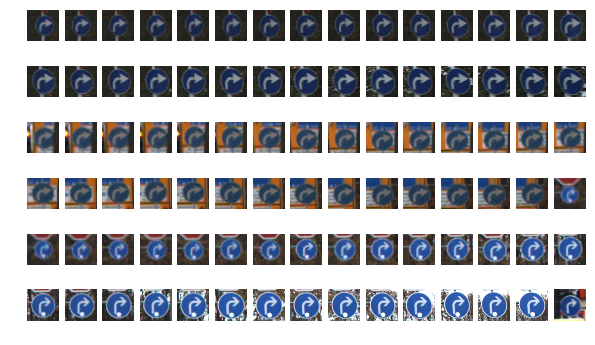

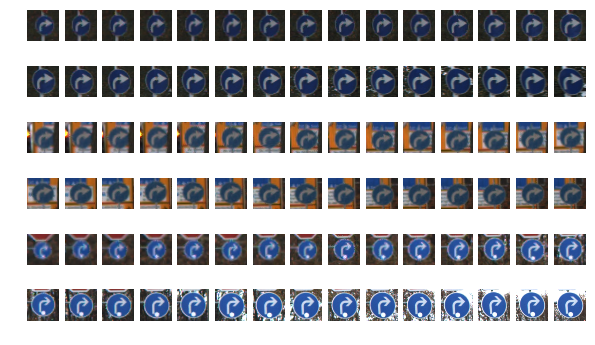

In [4]:
# the training dataset is composed of bursts of images from the same video 
# typically each video has 30 images and they are sequential in the set
# however the size of the training set 39209 is not divisible by 30
# there's one missing image at index 30*1122+29 (found by visual inspection)
# the code below just duplicates the previous one to make the training
# set bursts aligned each 30 images.

fig, axes = plt.subplots(6, 15, figsize=(10,6))

for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[(30*1121)+i])
plt.show()

X_train = np.insert(X_train,30*1122+29, X_train[30*1122+28], axis=0)
y_train = np.insert(y_train,30*1122+29, y_train[30*1122+28], axis=0)

fig, axes = plt.subplots(6, 15, figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(X_train[(30*1121)+i])
plt.show()

In [5]:
### Preprocess the data here.
### Generate data additional data (OPTIONAL!)
### Feel free to use as many code cells as needed.
import cv2

def normalize_yuv(items):
    normalized = np.copy(items)
    for item in range(items.shape[0]):
        channelmin  = np.min(items[item,:,:,0]).astype(float)
        channelpeak = np.max(items[item,:,:,0]).astype(float)
        normalized[item,:,:,0] = (255.0 * (items[item,:,:,0].astype(float) - channelmin) / (channelpeak - channelmin)).astype(normalized.dtype)
    return normalized

def to_yuv(items):
    yuv_item = np.empty_like(items)
    for item in range(items.shape[0]):
        yuv_item[item,:,:,:] = cv2.cvtColor(items[item,:,:,:], cv2.COLOR_RGB2YCrCb)
    return yuv_item

def equalize(items):
    equalized_item = np.copy(items)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    for item in range(items.shape[0]):
        equalized_item[item,:,:,0] = clahe.apply(items[item,:,:,0])
    return equalized_item

def normalize(items):
    return equalize(to_yuv(items))

def fake_items(items):
    faked = np.empty_like(items)
    cols,rows = image_shape
    box = np.float32([[0.,0.],[0.,32.],[32.,0.],[32.,32.]])
    for item in range(items.shape[0]):
        #distbox = box + np.random.rand(4,2) * 6. * np.float32([[1,1],[1,-1],[-1,1],[-1,-1]])
        #M = cv2.getPerspectiveTransform(np.array(distbox,dtype=np.float32),box)
        #faked[item,:,:,:] = cv2.warpPerspective(items[item,:,:,:],M,(cols,rows))

        # uncomment the following two lines for rotation, center of rotation and scaling (and comment above)
        M = cv2.getRotationMatrix2D((cols/2+random.randint(-2,2),rows/2+random.randint(-2,2)),random.uniform(-15,15),random.uniform(0.95,1.05))
        faked[item,:,:,:] = cv2.warpAffine(items[item,:,:,:],M,(cols,rows))

    return faked

# how many additional (faked) copies do we need?
fake_factor = 5

# initialize ?_train_faked as empty arrays first
X_train_faked = np.array([],dtype=X_train.dtype).reshape((0,32,32,3))
y_train_faked = []

# normalize in YUV colorspace (Y from 0:255, UV as-is)
X_train_normalized = normalize(X_train)
X_test_normalized  = normalize(X_test)

# fake fake_factor copies of each train item
for i in range(fake_factor):
    X_train_faked = np.concatenate((X_train_faked, fake_items(X_train_normalized)))
    y_train_faked = np.concatenate((y_train_faked, y_train))

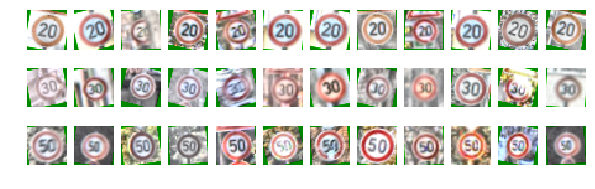

In [6]:
# show a few faked items
fig, axes = plt.subplots(3, 12, figsize=(10,3))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(cv2.cvtColor(X_train_normalized[classes_index[int(i/classes_per_row)][i % classes_per_row]], cv2.COLOR_YCrCb2RGB))
    ax.imshow(cv2.cvtColor(X_train_faked     [classes_index[int(i/classes_per_row)][i % classes_per_row]], cv2.COLOR_YCrCb2RGB))
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I just decided to convert data to YUV (YCrCb) and equalize the histogram on the luminance (Y). My goal was to try to emulate the "Traffic Sign Recognition with Multi-Scale Convolutional Networks" paper (the "paper" henceforward) and they described similar processing. I decided to keep images UINT8 since I also will augment the data later and memory was an issue when I converted it to float.

I also decided against applying further local normalization for edge enhancement as in the paper to keep things simple.


Bursts in training set: 1045 1045
Bursts in validation set: 262 262
(31350, 32, 32, 3)
1045 (31350,)


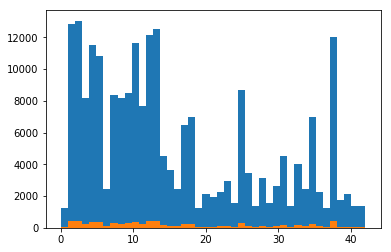

In [8]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
y_train_bursts = y_train[::30]
X_train_burst,X_validate_burst,y_train_burst, y_validate_burst = train_test_split(range(len(y_train_bursts)), y_train_bursts,test_size=0.2, random_state=0, stratify=y_train_bursts)
#X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
print("Bursts in training set:",len(X_train_burst), len(y_train_burst))
print("Bursts in validation set:",len(X_validate_burst), len(y_validate_burst))
X_train_augmented = np.empty([len(X_train_burst)   *30,32,32,3],dtype=X_train_normalized.dtype)
y_train_augmented = np.empty([len(y_train_burst)   *30]        ,dtype=y_train.dtype)
X_validate        = np.empty([len(X_validate_burst)*30,32,32,3],dtype=X_train_normalized.dtype)
y_validate        = np.empty([len(y_validate_burst)*30]        ,dtype=y_train.dtype)
print(X_train_augmented.shape)
print(len(y_train_burst),y_train_augmented.shape)
for j,(x_burst_index,y_burst) in enumerate(zip(X_train_burst,y_train_burst)):
    for i in range(30):
        X_train_augmented[j*30+i] = X_train_normalized[x_burst_index*30+i]
        y_train_augmented[j*30+i] = y_burst
        
for j,(x_burst_index,y_burst) in enumerate(zip(X_validate_burst,y_validate_burst)):
    for i in range(30):
        X_validate[j*30+i] = X_train_normalized[x_burst_index*30+i]
        y_validate[j*30+i] = y_burst

#X_train_augmented, X_validate, y_train_augmented, y_validate = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=0, stratify=y_train)

X_train_augmented = np.concatenate((X_train_augmented, X_train_faked))
y_train_augmented = np.concatenate((y_train_augmented, y_train_faked))

X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)

plt.hist(y_train_augmented, bins=n_classes)    
plt.hist(y_validate,        bins=n_classes)    
plt.show()

# Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

***Fixing the training set***

The training dataset is composed of bursts of images from the same video. Typically each video has 30 images and they are sequential in the set.

However the size of the training set (39209) which is not divisible by 30. There's one missing image at index 30*1122+29 (found by visual inspection). I added a missing sample at the right spot to make the training set bursts aligned each 30 images.

Knowing that each burst of 30 images belong to the same scene will help when picking the validation set. The rationale is that images from the same burst are too similar amongst themselves so if we blindly split the training set the validation set without accounting for this we will have images in the validation set too similar to the training set, and we want the validation set to be as close as possible as the test set (unseen images).

***Augmented data***
I decided to create additional copies of the data following the approach in the paper. 

I tried the following:
* Rotating [-15,15] degrees with center of rotation [-2,2] of center of image and scaling it [0.9,1.1]. This is described in the paper.
* Changing the perspective of the image by taking a poligon whose vertex are 4px far apart (x,y) from each point of the normal bounding box (0,0) (32,0) (0,32) (32,32).

I decided against rotating and scaling because while most of the the faked images are still recognizable as signs contained empty areas due to rotation and/or scaling when scaling factor was less than 1. Also, some signs are very blurry and/or small and if scaling them out they may become irrecognizable and hence add noise to the augmented training set.

At the end I created 20X more faked images for training.

***Training, Validation and testing***

I performed *a lot* of experiments to arrive to my current implementation and learned a lot in the process. Initially I started with a vanilla LeNet-5 and initially achieved ~90% test accuracy vs. ~95% validation accuracy. I watched [Andrew Ng video](https://www.youtube.com/watch?v=F1ka6a13S9I) where he describes what to do then the difference between test and validation accuracy is high: add more data or deepen your network. 

I checked the histogram and there was very few examples of some classes so that was the main motivation to augment the training set.

After creating 20X more examples I split the data as follows:

* *Test set* untouched (normalized)
* *Validation set* consists of 20% of the original (non-augmented) training examples (normalized)
* *Training set* consists of 80% of the original (non-augmented) training examples plus 20X new faked samples (generated by perspective warping of original samples) (normalized)

Note: ideally we'd like to have the validation set as close as possible to the test set. I did not include any faked images in the validation set because I think it would increases the chances of having bigger difference betwen test and validation accuracy. In the same vein, I picked the validation set with the same classes distribution as the training set (and hence the test set) by using (stratify) in the *test_train_split* function.


In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 100

from tensorflow.contrib.layers import flatten
tf.reset_default_graph()

def SermanetInspired6(x):    
    
    #  Stage 1: 
    #
    #        2d conv 
    #   Y => 32x32xY_features  ->                             
    #                          -> ReLU 32x32xS1_features -> 2:1 Pool 16x16xS1_features=> (S1)
    #  UV => 32x32xUV_features -> 
    
    Y_features  = 100
    UV_features = 8
    S1_features = Y_features + UV_features
    (x_y,x_u,x_v) = tf.split(3,3,x)
    x_uv = tf.concat(3,[x_u,x_v])

    L1Y_W = tf.get_variable("L1Y_W", shape=[5, 5, 1, Y_features], initializer=tf.contrib.layers.xavier_initializer())
    L1Y_b = tf.Variable(tf.zeros(Y_features))
    L1Y = tf.nn.bias_add(tf.nn.conv2d(x_y, L1Y_W, [1,1,1,1], 'SAME'), L1Y_b)
    L1UV_W = tf.get_variable("L1UV_W", shape=[5, 5, 2, UV_features], initializer=tf.contrib.layers.xavier_initializer())
    L1UV_b = tf.Variable(tf.zeros(UV_features))
    L1UV = tf.nn.bias_add(tf.nn.conv2d(x_uv, L1UV_W, [1,1,1,1], 'SAME'), L1UV_b)
    L1a = tf.concat(3,[L1Y,L1UV])
    L1b = tf.nn.dropout(tf.nn.relu(L1a), keep_prob[2])

    # Pooling. Input = 32x32xS1_features. Output = 16x16xS1_features.
    L1c = tf.nn.max_pool(L1b, [1,2,2,1], [1,2,2,1], 'SAME')
    print("L1 after pooling (input to L2): ", L1b.get_shape())

    # Pooling. Input = 16x16xS1_features. Output = 8x8xS1_features (for FC layers)
    L1cpf = flatten(tf.nn.max_pool(L1c, [1,2,2,1], [1,2,2,1], 'SAME'))
    print("L1 after pooling and flattening (input to FC): ", L1cpf.get_shape())

    #  Stage 2: 
    #
    #         2d conv                        
    #  S1 => 16x16xS2_features -> ReLU 16x16xS2_features -> 2:1 Pool 8x8xS2_features=> (S2)
    #
 
    S2_features = 108
    L2a_W = tf.get_variable("L2a_W", shape=[5, 5, S1_features, S2_features], initializer=tf.contrib.layers.xavier_initializer())
    L2a_b = tf.Variable(tf.zeros(S2_features))
    L2a =  tf.nn.bias_add(tf.nn.conv2d(L1c, L2a_W, [1,1,1,1], 'SAME'), L2a_b)
    L2b = tf.nn.dropout(tf.nn.relu(L2a), keep_prob[1])
    
    # Pooling. Input = 16x16xS2_features. Output = 8x8xS2_features.
    L2c = tf.nn.max_pool(L2b, [1,2,2,1], [1,2,2,1], 'VALID')
    print(L2c.get_shape())


    # Pooling. Input = 8x8xS2_features. Output = 4x4xS2_features (for FC layers)
    L2cpf = flatten(L2c)
  #  L2cpf = flatten(tf.nn.max_pool(L2c, [1,2,2,1], [1,2,2,1], 'SAME'))
    print("L2 after pooling and flattening (input to FC): ", L2cpf.get_shape())
    
    #  Stage 3: 
    #
    #         2d conv                        
    #  S3 => 8x8xS3_features -> ReLU 8x8xS3_features -> 2:1 Pool 4x4xS3_features (S3) (for FC layers)
    #
    S3_features = 0
    '''
    S3_features = 128
    L3a_W = tf.get_variable("L3a_W", shape=[5, 5, S2_features, S3_features], initializer=tf.contrib.layers.xavier_initializer())
    L3a_b = tf.Variable(tf.zeros(S3_features))
    L3a =  tf.nn.bias_add(tf.nn.conv2d(L2c, L3a_W, [1,1,1,1], 'SAME'), L3a_b)
    print(L3a.get_shape())
    L3b = tf.nn.relu(L3a)
    print(L2b.get_shape())
    L3c = tf.nn.max_pool(L3b, [1,2,2,1], [1,2,2,1], 'VALID')
    L3cf =flatten(L3c)
'''
    #  Stage 4: 
    #
    #       
    #  S1 => 4:1 Pool 4x4xS1_features ->                    
    #  S2 => 2:1 Pool 4x4xS2_features -> FC ReLU x1024 -> FC logits x43 (w/ dropout)          
    #  S3 =>          4x4xS3_features ->
    # 
         
    # Stage 4: Fully Connected w/ DROPOUT followed by Logits
    
    S4_features = 1024
    L4_W = tf.get_variable(name="L4_W",shape=[4*4*S3_features+8*8*S2_features +8*8*S1_features, S4_features], initializer=tf.contrib.layers.xavier_initializer())
    L4_b = tf.Variable(tf.zeros(S4_features))
    L4 =  tf.nn.dropout(tf.nn.relu( tf.nn.bias_add(tf.matmul(tf.concat(1,[L2cpf,L1cpf]), L4_W),L4_b)), keep_prob[0])
    print("FC: ", L4.get_shape())

    # Layer 5: Fully Connected. Output = n_classes.
    L5_W = tf.get_variable(name="L5_W",shape=[S4_features, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    L5_b = tf.Variable(tf.zeros(n_classes))
    logits =  tf.nn.bias_add(tf.matmul(L4, L5_W), L5_b)
    
    return logits



In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32,3)

one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = SermanetInspired6(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

L1 after pooling (input to L2):  (?, 32, 32, 108)
L1 after pooling and flattening (input to FC):  (?, 6912)
(?, 8, 8, 108)
L2 after pooling and flattening (input to FC):  (?, 6912)
FC:  (?, 1024)


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

BATCH_SIZE = 0

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: [1.0,1.0,1.0]})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# from http://stackoverflow.com/questions/38160940/how-to-count-total-number-of-trainable-parameters-in-a-tensorflow-model
def count_number_trainable_params():
    '''
    Counts the number of trainable variables.
    '''
    tot_nb_params = 0
    for trainable_variable in tf.trainable_variables():
        shape = trainable_variable.get_shape() # e.g [D,F] or [W,H,C]
        current_nb_params = get_nb_params_shape(shape)
        tot_nb_params = tot_nb_params + current_nb_params
    return tot_nb_params

def get_nb_params_shape(shape):
    '''
    Computes the total number of params for a given shap.
    Works for any number of shapes etc [D,F] or [W,H,C] computes D*F and W*H*C.
    '''
    nb_params = 1
    for dim in shape:
        nb_params = nb_params*int(dim)
    return nb_params 


In [ ]:
from time import time

for BATCH_SIZE in [1024]:
    for (L4_dropout,L2_dropout,L1_dropout) in [(0,0,0),(50,40,30),(75,45,30)]:
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train_augmented)

            print()
            print("Training: dropout L4={:d}% L2={:d}% L1={:d}%, batch size = {:d}. Initial validation accuracy: {:4.2f}%".format(L4_dropout,L2_dropout,L1_dropout, BATCH_SIZE,100. * evaluate(X_validate, y_validate)))        
            print("Trainable params: {:d}".format(count_number_trainable_params()))
            print("-------------------+-------------------+-------------------+-------------------+")
            max_validation_accuracy = 0.
            decreasing_accuracy_epochs = 0

            first_epoch = last_epoch = time()

            for i in range(EPOCHS):
                X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = X_train_augmented[offset:end], y_train_augmented[offset:end]
                    k_prob = 1. - np.array([L4_dropout,L2_dropout,L1_dropout]) / 100.
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: k_prob})

                validation_accuracy = evaluate(X_validate, y_validate)
                if validation_accuracy > max_validation_accuracy:
                    max_validation_accuracy = validation_accuracy
                    decreasing_accuracy_epochs = 0
                    saver.save(sess, 'sermanet-inspired')
                else:
                    decreasing_accuracy_epochs += 1

                current_time = time()
                epoch_time = current_time - last_epoch
                last_epoch = current_time

                print(" {:2d}: {:4.1f}%{} ({:3.0f}s) |".format(i,validation_accuracy*100,'*' if decreasing_accuracy_epochs == 0 else ' ' , epoch_time),end="")
                if ((i+1) % 4) == 0 :
                    print()
                if (validation_accuracy >= 0.999) | (decreasing_accuracy_epochs >= 5):
                    break    

            if ((i+1) % 4) != 0 :
                print()
            print("Training took {:.0f} seconds. Max validation accuracy = {:4.2f}%".format(last_epoch - first_epoch ,100. * max_validation_accuracy ))

        with tf.Session() as sess:
            saver.restore(sess, tf.train.latest_checkpoint('.'))

            test_accuracy = evaluate(X_test_normalized, y_test)
            print("Test Accuracy = {:4.2f}%".format(100. * test_accuracy))
            print()
        


Training: dropout L4=0% L2=0% L1=0%, batch size = 1024. Initial validation accuracy: 0.38%
Trainable params: 14495591
-------------------+-------------------+-------------------+-------------------+
  0: 10.9%* ( 56s) |  1: 12.5%* ( 56s) |  2: 97.4%* ( 56s) |  3: 99.0%* ( 56s) |
  4: 99.4%* ( 56s) |  5: 99.7%* ( 56s) |  6: 99.7%* ( 56s) |  7: 99.8%* ( 56s) |
  8: 99.7%  ( 55s) |  9: 99.2%  ( 55s) | 10: 99.6%  ( 55s) | 11: 99.8%* ( 56s) |
 12: 99.7%  ( 55s) | 13: 99.6%  ( 55s) | 14: 99.6%  ( 55s) | 15: 99.7%  ( 55s) |
 16: 99.9%* ( 56s) | 17: 99.8%  ( 55s) | 18: 99.3%  ( 55s) |

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.